# Programming Assignment 1

## Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords

from textblob import TextBlob
import spacy
import timeit

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Read Text File

In [2]:
def read_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        content = file.read()
    return content

## Clean Text and Remove Stopwords

The text is cleaned by removing special characters, emojis, and extra spaces. Stopwords are removed using NLTK's stopwords list.

In [3]:
def clean_text(text):
    text = text.lower()
    text = ''.join(char for char in text if char.isalnum() or char.isspace())
    text = re.sub(r'\s+', ' ', text).strip()
    return text

def remove_stopwords(tokenized_text):
    stop_words = set(stopwords.words('english'))
    filtered_text = [word for word in tokenized_text if word not in stop_words]
    return filtered_text

## Framework Comparison

### NLTK

Text is tokenized into words using NLTK's `word_tokenize` function.

For cleaned.txt, cleaned and tokenized words without stopwords are rejoined into a single string.

For words.txt, unique tokens are extracted and written to the file.

For top10words.txt, the top 10 most frequent words and their counts are extraceted using NLTK's `FreqDist` and written to the file.

In [4]:
def nltk_processing(file_path):
    text = read_file(file_path)
    text = clean_text(text)
    word_tokens = nltk.word_tokenize(text)
    tokens_no_stopwords = remove_stopwords(word_tokens)

    cleaned_text = ' '.join(tokens_no_stopwords)
    with open('output/nltk/cleaned.txt', 'w', encoding='utf-8') as file:
        file.write(cleaned_text)

    unique_tokens = np.unique(tokens_no_stopwords)
    with open('output/nltk/words.txt', 'w', encoding='utf-8') as file:
        for word in unique_tokens:
            file.write(f"{word}\n")

    word_freq = nltk.FreqDist(tokens_no_stopwords)
    with(open('output/nltk/top10words.txt', 'w', encoding='utf-8')) as file:
        for word, frequency in word_freq.most_common(10):
            file.write(f"{word}: {frequency}\n")

### TextBlob

`TextBlob` is used to tokenize the cleaned text into words.

The cleaned text without stopwords is rejoined into a single string and written to cleaned.txt.

Unique tokens are extracted and written to words.txt.

The top 10 most frequent words and their counts are obtained using `TextBlob`'s `word_counts` and written to top10words.txt.

In [5]:
def textblob_processing(file_path):
    text = read_file(file_path)
    text = clean_text(text)
    blob = TextBlob(text)
    word_tokens = blob.words
    tokens_no_stopwords = remove_stopwords(word_tokens)
    unique_tokens = np.unique(tokens_no_stopwords)

    cleaned_text = ' '.join(tokens_no_stopwords)
    word_freq = TextBlob(cleaned_text).word_counts

    with open('output/textblob/cleaned.txt', 'w', encoding='utf-8') as file:
        file.write(cleaned_text)

    with open('output/textblob/words.txt', 'w', encoding='utf-8') as file:
        for word in unique_tokens:
            file.write(f"{word}\n")
    
    with(open('output/textblob/top10words.txt', 'w', encoding='utf-8')) as file:
        for word, frequency in sorted(word_freq.items(), key=lambda item: item[1], reverse=True)[:10]:
            file.write(f"{word}: {frequency}\n")
    


### SpaCy

`en_core_web_sm` model is loaded using SpaCy. That model is used to process the cleaned text.

The cleaned text without stopwords is rejoined into a single string and written to cleaned.txt. Stopwords from NLTK are used.

Unique tokens are extracted from the SpaCy Doc object and written to words.txt.

The top 10 most frequent words and their counts are obtained by manually counting tokens and written to top10words.txt.

In [6]:
def spacy_processing(file_path):
    nlp = spacy.load("en_core_web_sm")
    text = read_file(file_path)
    text = clean_text(text)
    doc = nlp(text)
    tokens_no_stopwords = remove_stopwords([token.text for token in doc])
    unique_tokens = np.unique(tokens_no_stopwords)
    word_freq = {}

    for token in tokens_no_stopwords:
        word_freq[token] = word_freq.get(token, 0) + 1

    cleaned_text = ' '.join(tokens_no_stopwords)

    with open('output/spacy/cleaned.txt', 'w', encoding='utf-8') as file:
        file.write(cleaned_text)

    with open('output/spacy/words.txt', 'w', encoding='utf-8') as file:
        for word in unique_tokens:
            file.write(f"{word}\n")

    with(open('output/spacy/top10words.txt', 'w', encoding='utf-8')) as file:
        for word, frequency in sorted(word_freq.items(), key=lambda item: item[1], reverse=True)[:10]:
            file.write(f"{word}: {frequency}\n")

### Comparison Results

The time taken by each framework for cleaning, tokenization, and frequency analysis is compared.

We can see that NLTK is the fastest among the three frameworks, followed by TextBlob and SpaCy.

SpaCy is the slowest probably due to its more complex processing pipeline and additional features and also because of having to load the language model.

  Framework  Time (seconds)
0      NLTK        0.100874
1  TextBlob        0.157919
2     SpaCy        6.721912


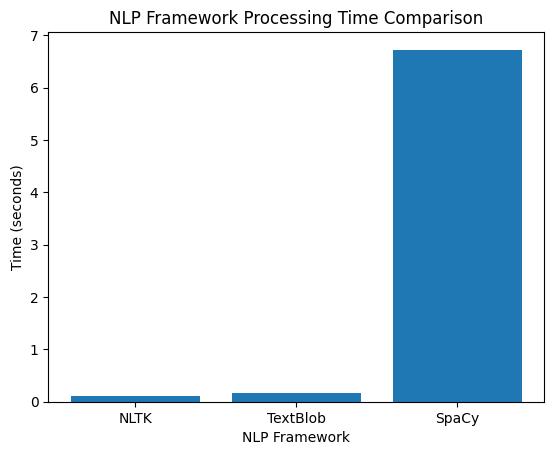

In [8]:
file_path = 'cantrbry/alice29.txt'
nltk_time = timeit.timeit(lambda: nltk_processing(file_path), number=1)
textblob_time = timeit.timeit(lambda: textblob_processing(file_path), number=1)
spacy_time = timeit.timeit(lambda: spacy_processing(file_path), number=1)
time_comparison_df = pd.DataFrame({
    'Framework': ['NLTK', 'TextBlob', 'SpaCy'],
    'Time (seconds)': [nltk_time, textblob_time, spacy_time]
})
print(time_comparison_df)
with open('output/time_comparison.txt', 'w', encoding='utf-8') as file:
    file.write(time_comparison_df.to_string(index=False))

plt.bar(time_comparison_df['Framework'], time_comparison_df['Time (seconds)'])
plt.xlabel('NLP Framework')
plt.ylabel('Time (seconds)')
plt.title('NLP Framework Processing Time Comparison')
plt.show()